<a href="https://colab.research.google.com/github/vishal-badiger/test_demo/blob/master/TF2ODAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import cv2

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
%cd "/content/gdrive/MyDrive/Colab Notebooks/Computer vision TF2X/Object detection/TF2ODAPI"

/content/gdrive/MyDrive/Colab Notebooks/Computer vision TF2X/Object detection/TF2ODAPI


In [5]:
!git clone https://github.com/tensorflow/models.git

fatal: destination path 'models' already exists and is not an empty directory.


In [6]:
!apt-get install protobuf-compiler python-lxml python-pil
!pip install Cython pandas tf-slim lvis

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following additional packages will be installed:
  python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  python-genshi python-lxml-dbg python-lxml-doc python-pil-doc python-pil-dbg
  python-setuptools
The following NEW packages will be installed:
  python-bs4 python-chardet python-html5lib python-lxml python-olefile
  python-pil python-pkg-resources python-six python-webencodings
0 upgraded, 9 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,614 kB of archives.
After this operation, 8,908 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-bs4 all 4.6.0-1 [67.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-pkg-resources all 39.0.1-2 [128 kB]
Get:3 http:/

In [7]:
%cd "/content/gdrive/MyDrive/Colab Notebooks/Computer vision TF2X/Object detection/TF2ODAPI/models/research"
!protoc object_detection/protos/*.proto --python_out=.

/content/gdrive/MyDrive/Colab Notebooks/Computer vision TF2X/Object detection/TF2ODAPI/models/research


In [8]:
import os
import sys
os.environ["PYTHONPATH"]+=":/content/gdrive/MyDrive/Colab Notebooks/Computer vision TF2X/Object detection/TF2ODAPI/models/research"
sys.path.append("/content/gdrive/MyDrive/Colab Notebooks/Computer vision TF2X/Object detection/TF2ODAPI/models/research")

In [9]:
%cd "/content/gdrive/MyDrive/Colab Notebooks/Computer vision TF2X/Object detection/TF2ODAPI/models/research/"
!cp object_detection/packages/tf2/setup.py .

/content/gdrive/MyDrive/Colab Notebooks/Computer vision TF2X/Object detection/TF2ODAPI/models/research


In [10]:
!python setup.py build
!python setup.py install

running build
running build_py
copying object_detection/protos/anchor_generator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/bipartite_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/argmax_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/calibration_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_predictor_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/eval_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/center_net_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/faster_rcnn_box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/flexible_grid_anchor_generator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/faster_rcnn_pb2.py -> 

In [11]:
!python object_detection/builders/model_builder_tf2_test.py

2021-11-28 17:14:09.772680: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Running tests under Python 3.7.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W1128 17:14:10.204150 140640620132224 model_builder.py:1100] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.72s
I1128 17:14:10.495731 140640620132224 test_util.py:2309] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.72s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.98s
I1128 17:14:11.478551 140640620132224 test_util.py:2309] time(__main__.ModelBuilderTF2Test.test_cr

In [12]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display
import pathlib

In [13]:
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [14]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [15]:
def load_model(model_name):
  base_url = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/'
  model_file = model_name + '.tar.gz'
  model_dir = tf.keras.utils.get_file(
    fname=model_name, 
    origin=base_url + model_file,
    untar=True)

  model_dir = pathlib.Path(model_dir)/"saved_model"

  model = tf.saved_model.load(str(model_dir))

  return model

In [16]:
PATH_TO_LABELS = "/content/gdrive/MyDrive/Colab Notebooks/Computer vision TF2X/Object detection/TF2ODAPI/models/research/object_detection/data/mscoco_label_map.pbtxt"
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [17]:
#model_name = 'ssd_resnet50_v1_fpn_640x640_coco17_tpu-8'
#model_name = 'efficientdet_d0_coco17_tpu-32'
model_name = 'centernet_resnet101_v1_fpn_512x512_coco17_tpu-8'
detection_model = load_model(model_name)

346005504/345992335 [==============================] - 5s 0us/step


In [18]:
print(detection_model.signatures['serving_default'].inputs)

[<tf.Tensor 'input_tensor:0' shape=(1, None, None, 3) dtype=uint8>, <tf.Tensor 'unknown:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_0:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_1:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_2:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_3:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_4:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_5:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_6:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_7:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_8:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_9:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_10:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_11:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_12:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_13:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_14:0' shape=<unknown> dtype=resource>, <

In [19]:
print(detection_model.signatures['serving_default'].output_dtypes)

{'detection_scores': tf.float32, 'detection_boxes': tf.float32, 'detection_classes': tf.float32, 'num_detections': tf.float32}


In [20]:
detection_model.signatures['serving_default'].output_shapes

{'detection_boxes': TensorShape([1, 100, 4]),
 'detection_classes': TensorShape([1, 100]),
 'detection_scores': TensorShape([1, 100]),
 'num_detections': TensorShape([1])}

In [21]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

In [22]:
def show_inference_pics(model, image_path):
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = np.array(Image.open(image_path))
  # Actual detection.
  output_dict = run_inference_for_single_image(model, image_np)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)

  display(Image.fromarray(image_np))

In [23]:
PATH_TO_TEST_IMAGES_DIR = pathlib.Path("/content/gdrive/MyDrive/Colab Notebooks/Computer vision TF2X/Object detection/imgs")
TEST_IMAGE_PATHS = sorted(list(PATH_TO_TEST_IMAGES_DIR.glob("*.jpg")))
TEST_IMAGE_PATHS

[PosixPath('/content/gdrive/MyDrive/Colab Notebooks/Computer vision TF2X/Object detection/imgs/image1.jpg'),
 PosixPath('/content/gdrive/MyDrive/Colab Notebooks/Computer vision TF2X/Object detection/imgs/image2.jpg')]

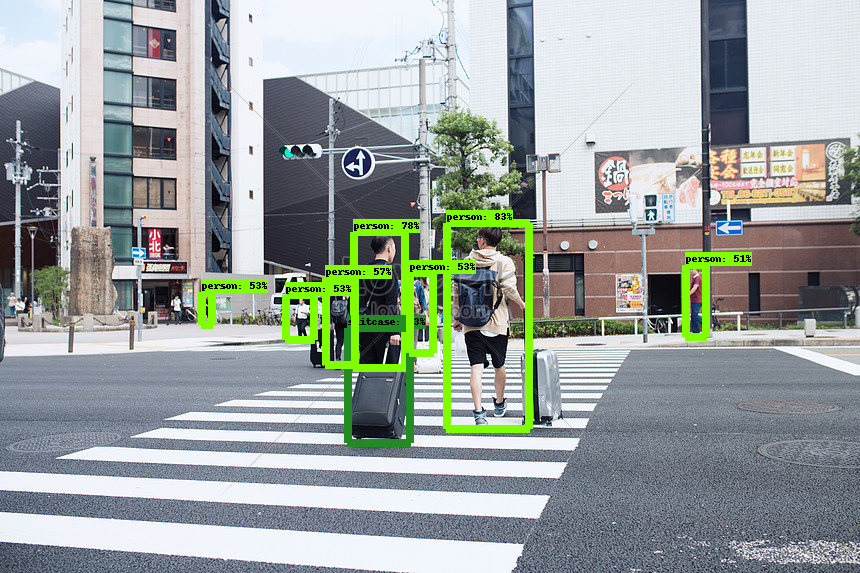

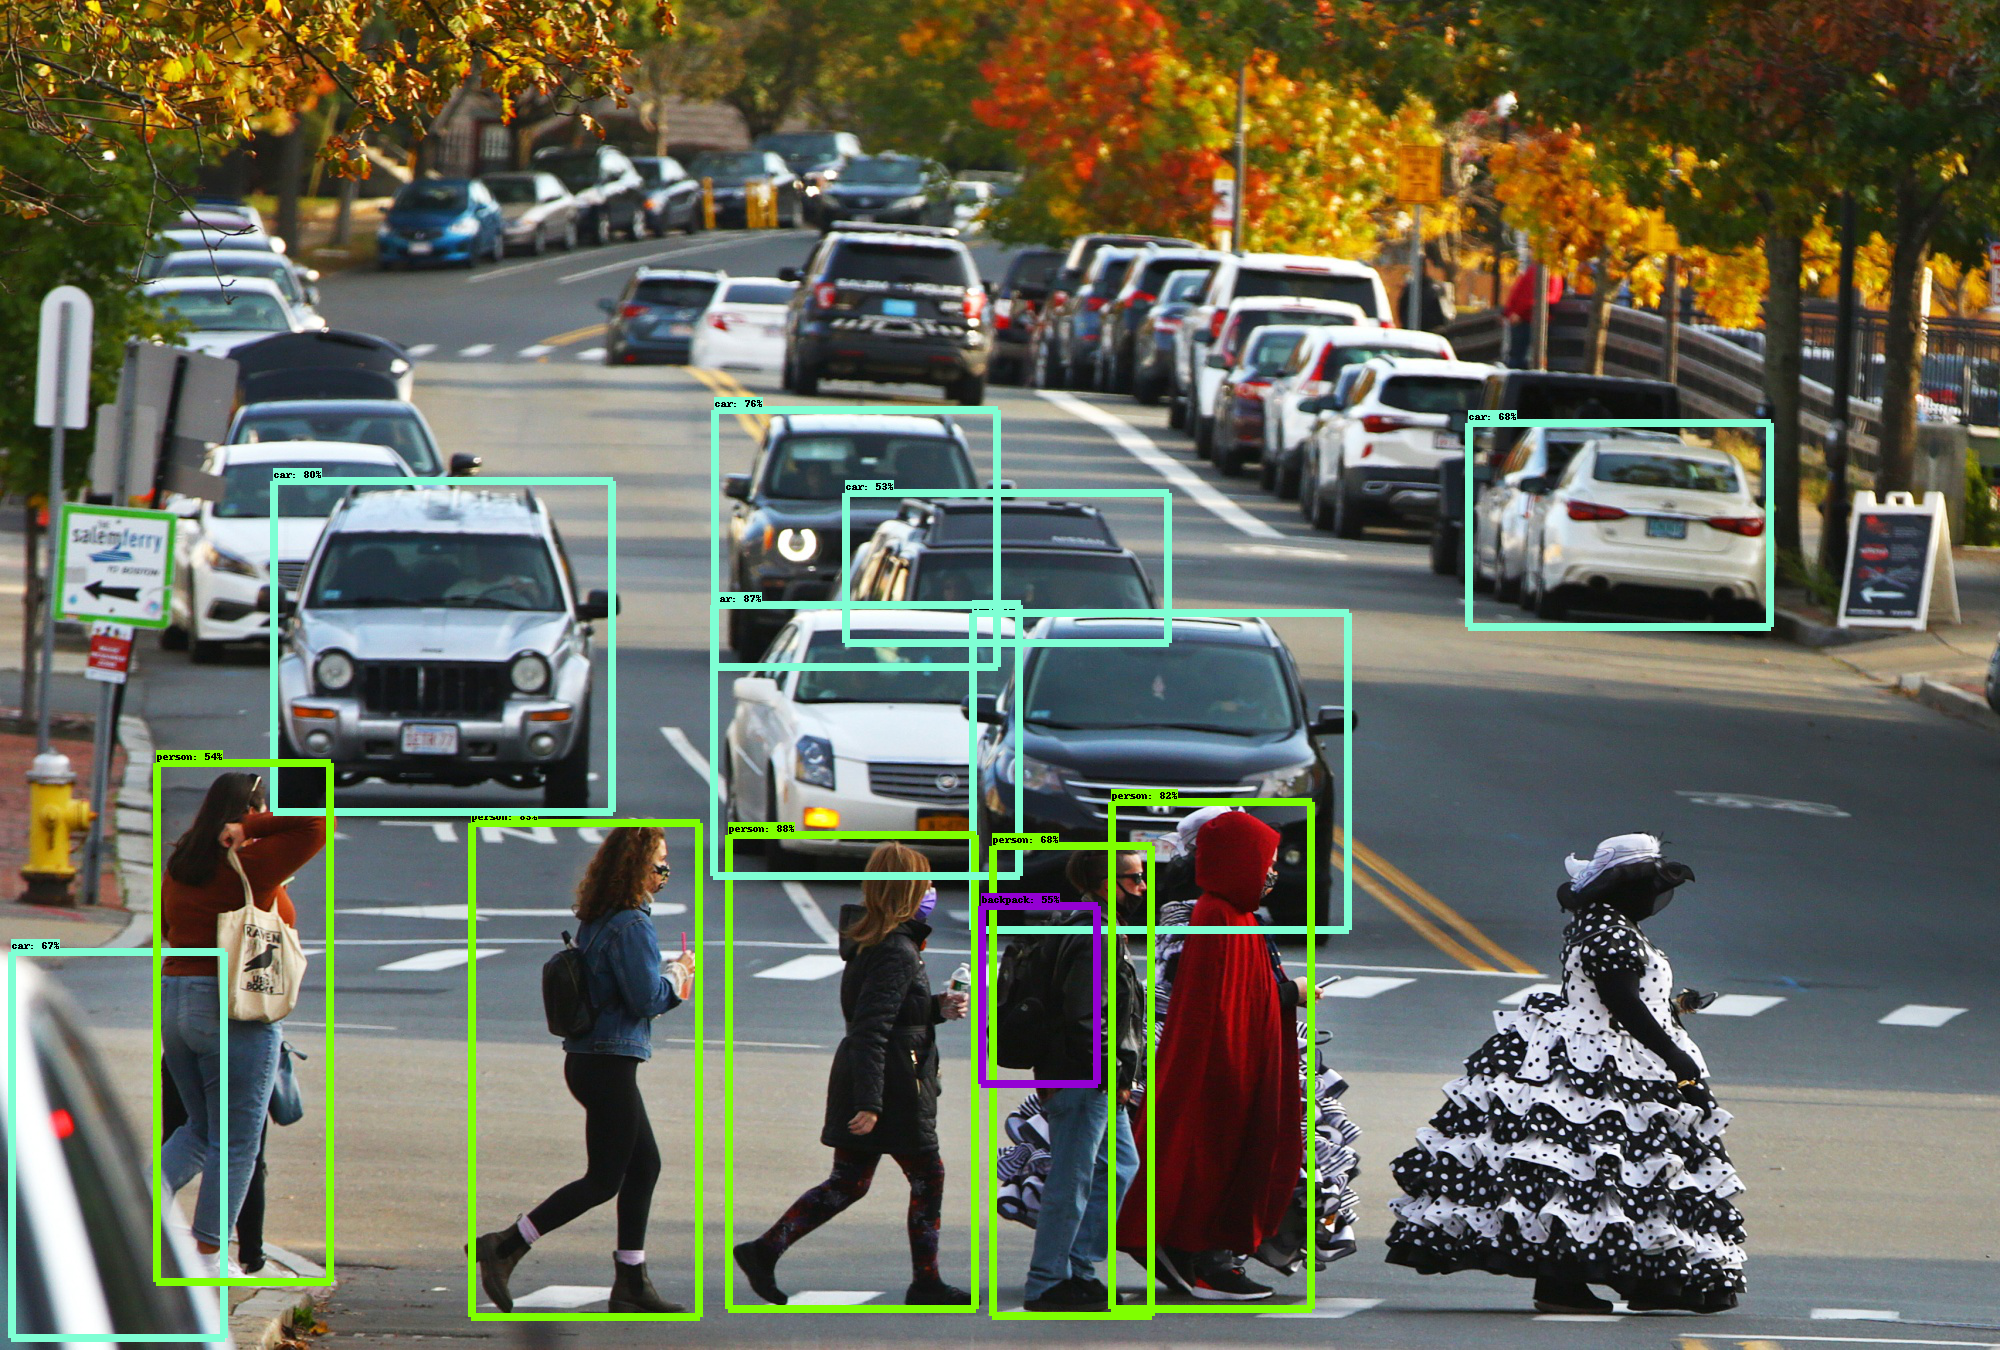

In [24]:
for image_path in TEST_IMAGE_PATHS:
  show_inference_pics(detection_model, image_path)

In [25]:
import cv2
from google.colab.patches import cv2_imshow


def run_inference_videos(model, cap, output_path, fps=20.0):  
    ret, image_np = cap.read()
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (1920, 1080))
    
    while ret:

        # Actual detection.
        output_dict = run_inference_for_single_image(model, image_np)
        # Visualization of the results of a detection.
        vis_util.visualize_boxes_and_labels_on_image_array(
            image_np,
            output_dict['detection_boxes'],
            output_dict['detection_classes'],
            output_dict['detection_scores'],
            category_index,
            instance_masks=output_dict.get('detection_masks_reframed', None),
            use_normalized_coordinates=True,
            line_thickness=8)
        
        out.write(image_np)
        ret, image_np = cap.read()

        #cv2_imshow(cv2.resize(image_np, (800, 600)))
        if cv2.waitKey(25) & 0xFF == ord('q'):
            cap.release()
            cv2.destroyAllWindows()
            out.release()
            break    


In [26]:
output_path = '/content/gdrive/MyDrive/Colab Notebooks/Computer vision TF2X/Object detection/miami-sf-output.mp4'
cap = cv2.VideoCapture('/content/gdrive/MyDrive/Colab Notebooks/Computer vision TF2X/Object detection/videos/miami-sf.mp4')
run_inference_videos(detection_model, cap, output_path)